### OSMから取得した道路ネットワークデータを用いて、六本木交差点周辺道路を調査する
六本木交差点から半径1kmの範囲の高速道路を除く全ての道路を取得、それぞれの道路属性に色を付ける


In [223]:
import folium
from IPython.display import IFrame
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import osmnx as ox


ox.config(use_cache=True, log_console=True, useful_tags_path=['highway','width','lanes','sidewalk','surface'])
%matplotlib inline

#＃＃　六本木交差点から半径1000ｍの道路ネットワークをOSMから生成する ###
ROPPONGI = (35.663236, 139.732275)
G = ox.graph_from_point(ROPPONGI, distance=1000, network_type='all', simplify=False)
G.edges()

# # 高速道路 removal
motorway = [ (u, v, k, data) for u, v, k, data in G.edges(keys=True, data=True)  if data['highway'] == 'motorway']
G.remove_edges_from(motorway)
G = ox.remove_isolated_nodes(G)
G = ox.simplify_graph(G)




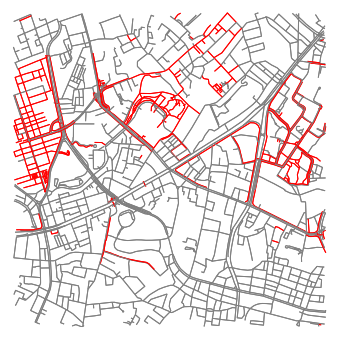

(<Figure size 529.621x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x122851cc0>)

In [224]:
# 歩道あり道路を赤
ec = ['r' if  'sidewalk' in data.keys() or data['highway'] == 'footway' else 'grey' for u, v, key, data in G.edges(keys=True, data=True)]
ox.plot_graph(G, node_size=0, edge_color=ec)

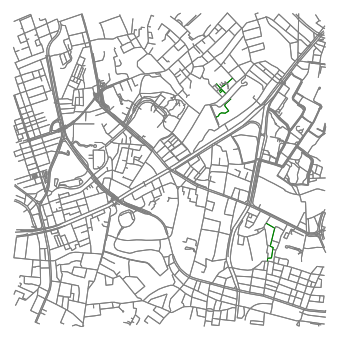

(<Figure size 529.621x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12227e9b0>)

In [225]:
# 幅員の定義がある道を緑
ec = ['g' if  'width' in data.keys() else 'grey' for u, v, key, data in G.edges(keys=True, data=True)]
ox.plot_graph(G, node_size=0, edge_color=ec)


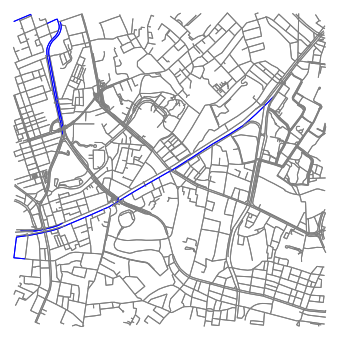

(<Figure size 529.621x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x140d48940>)

In [226]:
# 3レーンが青
ec = ['b' if  'lanes' in data.keys() and data['lanes'] == '3' else 'grey' for u, v, key, data in G.edges(keys=True, data=True)]
ox.plot_graph(G, node_size=0, edge_color=ec)


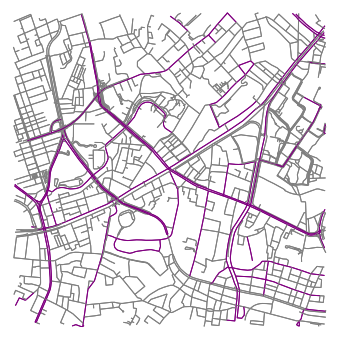

(<Figure size 529.621x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x140e7f550>)

In [227]:
# 2レーンが紫
ec = ['purple' if  'lanes' in data.keys() and data['lanes'] == '2' else 'grey' for u, v, key, data in G.edges(keys=True, data=True)]
ox.plot_graph(G, node_size=0, edge_color=ec)


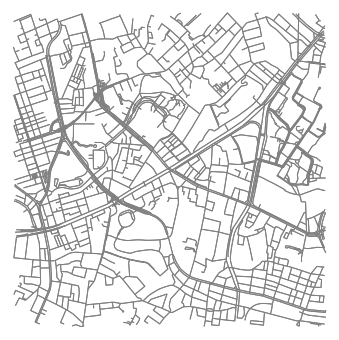

(<Figure size 529.621x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12676a128>)

In [228]:
# 一方通行が赤
ec = ['r' if  data['oneway'] else 'grey' for u, v, key, data in G.edges(keys=True, data=True)]
ox.plot_graph(G, node_size=0, edge_color=ec)

In [229]:
# GeoDataFrame形式で表示
gdf = ox.graph_to_gdfs(G, nodes=False)
gdf

,geometry,highway,key,lanes,length,oneway,osmid,sidewalk,surface,u,v,width
0,"LINESTRING (139.727092 35.6624278, 139.7269528...",steps,0,NaN,20.168,False,185722907,NaN,NaN,1963851776,1963851782,NaN
1,"LINESTRING (139.7274252 35.6624108, 139.727530...",unclassified,0,NaN,10.866,False,151697937,NaN,NaN,1963851779,1075233618,NaN
2,"LINESTRING (139.7274252 35.6624108, 139.727301...",unclassified,0,NaN,12.796,False,151697937,NaN,NaN,1963851779,1645426567,NaN
3,"LINESTRING (139.7274252 35.6624108, 139.727218...",steps,0,NaN,41.166,False,185722918,NaN,NaN,1963851779,1024520015,NaN
4,"LINESTRING (139.7269528 35.6625696, 139.726683...",residential,0,NaN,31.554,False,88167898,NaN,NaN,1963851782,2279572934,NaN
5,"LINESTRING (139.7269528 35.6625696, 139.726977...",residential,0,NaN,2.861,False,88167898,NaN,NaN,1963851782,1645426585,NaN
6,"LINESTRING (139.7269528 35.6625696, 139.726720...",pedestrian,0,NaN,33.046,False,185722905,NaN,NaN,1963851782,1645415029,NaN
7,"LINESTRING (139.7269528 35.6625696, 139.727092...",steps,0,NaN,20.168,False,185722907,NaN,NaN,1963851782,1963851776,NaN
8,"LINESTRING (139.7323207 35.6720485, 139.732626...",tertiary,0,2,34.148,False,40969693,NaN,paved,1596063751,4987747989,NaN
9,"LINESTRING (139.7432786 35.6693028, 139.742936...",tertiary,0,2,31.086,False,502534802,NaN,paved,1618362379,1617299645,NaN
